<a href="https://colab.research.google.com/github/Sylvariane/Analyse-vente/blob/master/P04_02_scriptanalyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des ventes

## 1. Téléchargement des modules et des fichiers

On importe les différents modules nécessaires à l'analyse des ventes. Ensuite, on importe les fichiers csv crées par le script des données pour les analyser. Les fichiers utilisés dans cette analyse sont générés par le script de nettoyage. 

In [1]:
# connexion à Google Drive pour importer les dossiers

from google.colab import drive
drive.mount('/content/drive')
image_dir= '/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/P04_03_graphique'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st 
import statsmodels.api as sm
import math

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sells = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/sells.csv', parse_dates = True)
prod = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/prod.csv')
custom = pd.read_csv('/content/drive/My Drive/Formation Data Analyst/Livrables/P4_guillot_cecile/custom.csv')

## 2. Statistiques descriptives et analyses univariées

On débute cette analyse par la description de nos différents fichiers. Les analyses univariées seront effectuées fichier par fichier avant d'être effectués sur un dataFrame regroupant toutes les informations et crées pour l'occasion. 

### 2.1. Description des clients

#### 2.1.1. Calculs et représentations graphiques

Après avoir chargé le fichier des clients, on réinitie l'index et on modifie le type de la variable 'sex' pour en faire une variable catégorielle. 

In [4]:
custom.reset_index()
custom = custom[['client_id', 'sex', 'birth']]
custom['sex'] = custom['sex'].astype('category')
custom = custom.replace('f', 'F') 
custom = custom.replace('m', 'M')
custom = custom.sort_values('client_id')
print(custom.head())
print(custom.dtypes)

     client_id sex  birth
4298       c_1   M   1955
6893      c_10   M   1956
2137     c_100   M   1992
8471    c_1000   F   1966
3425    c_1001   M   1982
client_id      object
sex          category
birth           int64
dtype: object


On ajoute une colonne 'age' à notre fichier pour pouvoir voir la répartition des âges dans notre fichier client.

In [5]:
custom['age'] = 2022 - custom['birth']
print(custom.head())

     client_id sex  birth  age
4298       c_1   M   1955   67
6893      c_10   M   1956   66
2137     c_100   M   1992   30
8471    c_1000   F   1966   56
3425    c_1001   M   1982   40


In [6]:
#Définition de classe d'âge
cut_bins = [17, 31, 51, 94]
cut_labels = ['18-30', '31-50', '51+']
custom['classe_age'] = pd.cut(custom['age'], bins=cut_bins, labels=cut_labels)

On s'intéresse à la répartition des femmes et des hommes dans notre fichier client. 

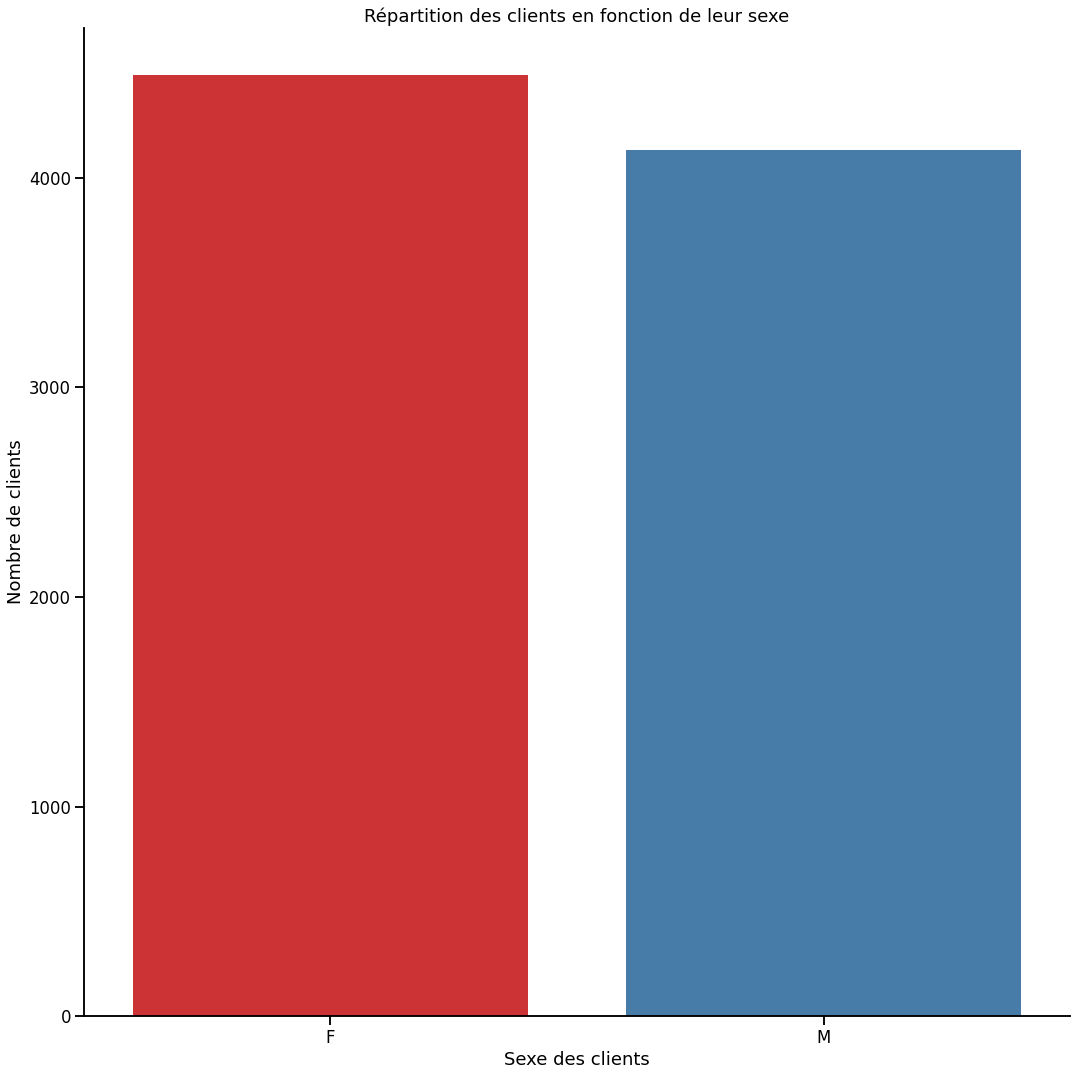

In [7]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = sns.catplot('sex', data=custom, kind='count', height=15)
_ = plt.xlabel('Sexe des clients')
_ = plt.ylabel('Nombre de clients')
_ = plt.title('Répartition des clients en fonction de leur sexe')
_ = plt.savefig(f'{image_dir}/1 - Répartition HF.jpg')
_ = plt.show()

Le nombre d'hommes et de femmes est équivalent. On crée deux dataFrames contenant les informations des clients féminins et masculins pour faire d'autres analyses. 

In [8]:
custom_f = custom[custom['sex']=='F']
custom_m = custom[custom['sex']=='M']

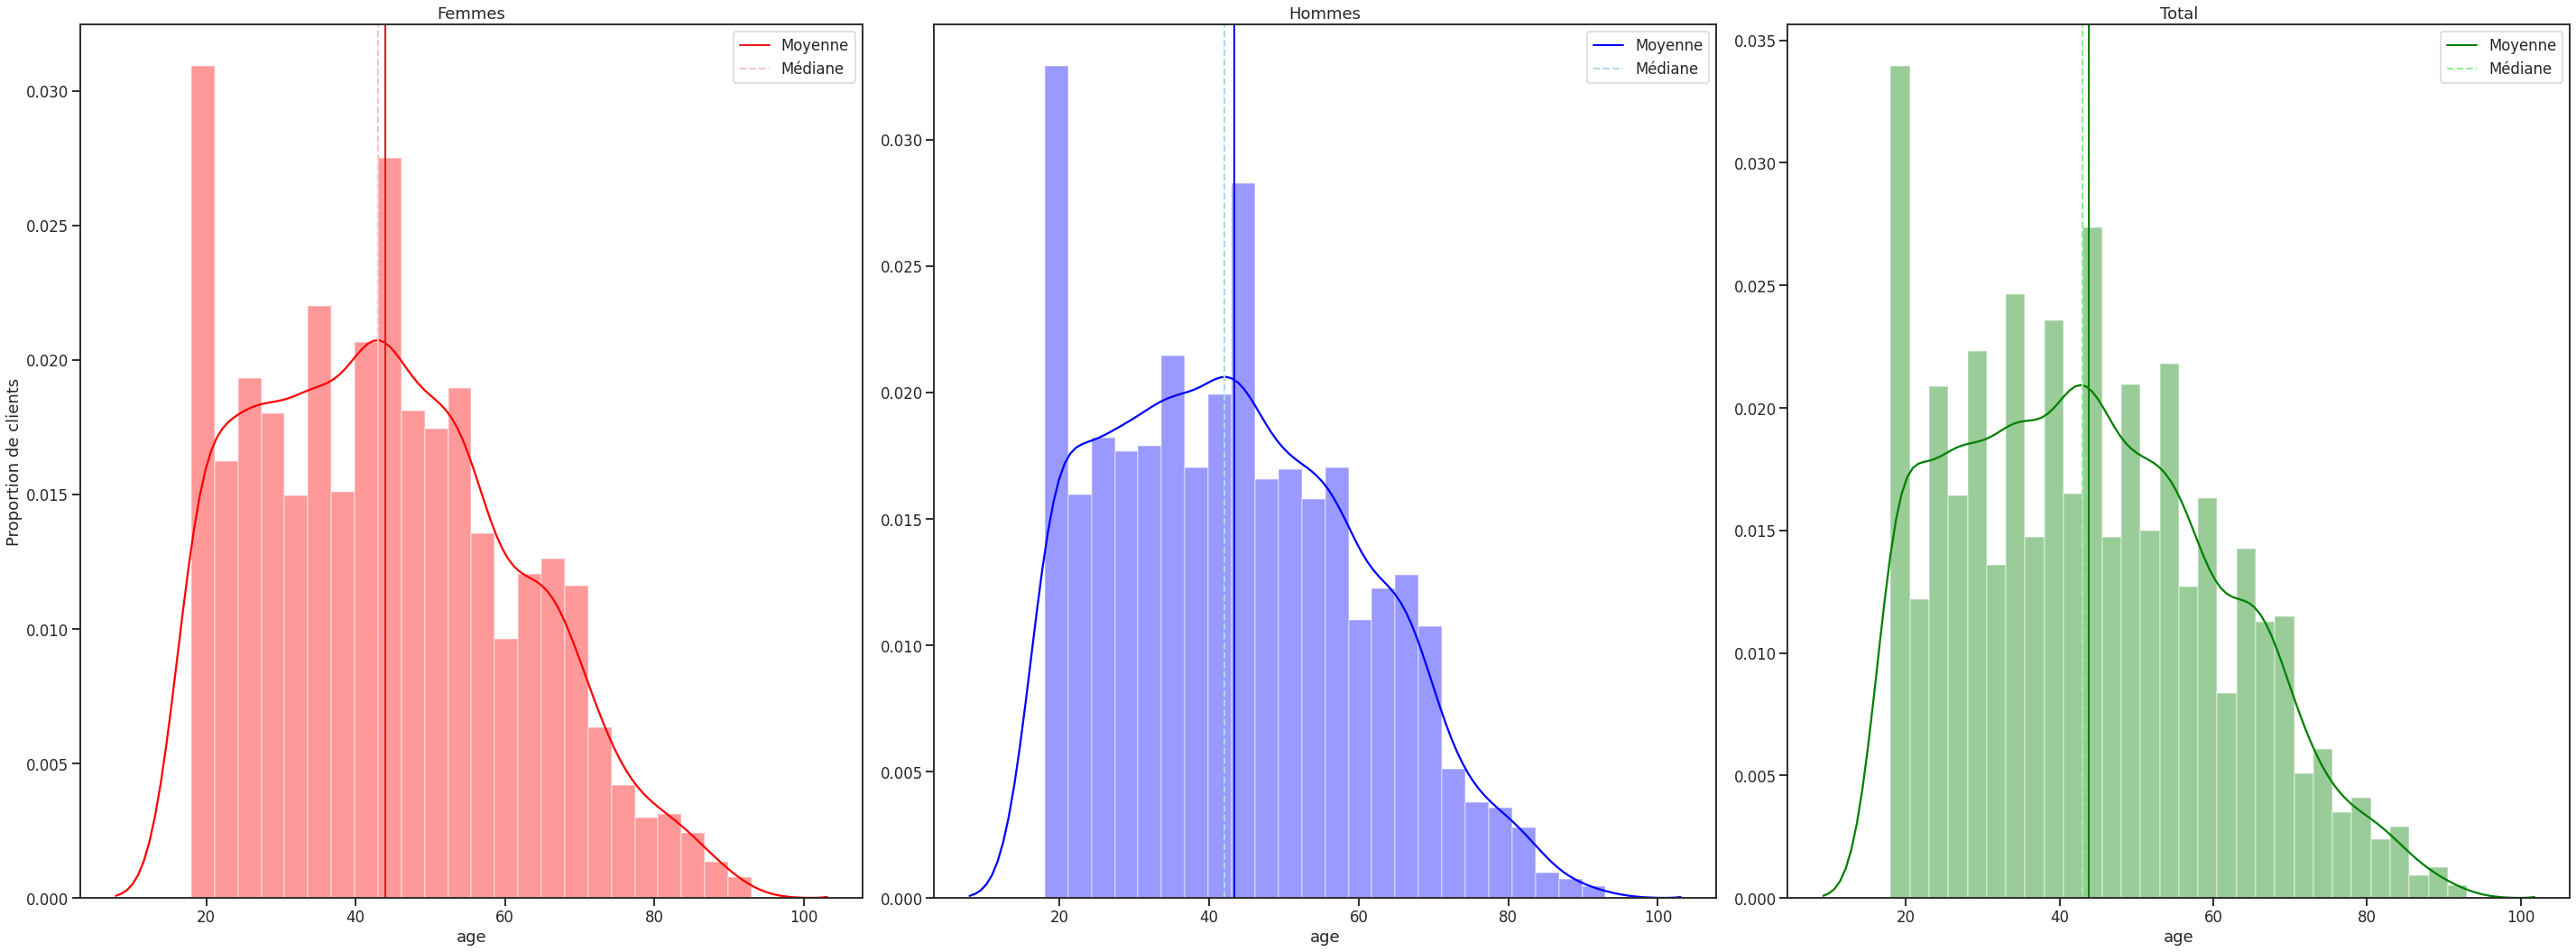

In [9]:
sns.set_style('ticks')
sns.set_context('talk')
plt.figure(figsize = (40,15))

_ = plt.subplot(1, 3, 1)
_ = sns.distplot(custom_f['age'], color='red')
_ = plt.axvline(x=custom_f['age'].mean(), label='Moyenne', linestyle='-', linewidth=2)
_ = plt.axvline(x=custom_f['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='pink')
_ = plt.ylabel('Proportion de clients')
_ = plt.title('Femmes')
_ = plt.legend()

_ = plt.subplot(1,3,2)
_ = sns.distplot(custom_m['age'], color='blue')
_ = plt.axvline(x=custom_m['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='b')
_ = plt.axvline(x=custom_m['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightblue')
_ = plt.title('Hommes')
_ = plt.legend()

_ = plt.subplot(1,3,3)
_ = sns.distplot(custom['age'], color='green')
_ = plt.axvline(x=custom['age'].mean(), label='Moyenne', linestyle='-', linewidth=2, color='g')
_ = plt.axvline(x=custom['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='lightgreen')
_ = plt.title('Total')
_ = plt.legend()

_ = plt.tight_layout()

_ = plt.savefig(f'{image_dir}/2 - Répartition des âges.jpg')
_ = plt.show()

In [10]:
fem_skew = st.skew(custom_f['age'])
mal_skew = st.skew(custom_m['age'])
skew_total = st.skew(custom['age'])
print('Skewness Femmes = ' + str(fem_skew) + ' ; Skewness Hommes = ' + str(mal_skew) + ' ; Skewness Total = ' + str(skew_total))

Skewness Femmes = 0.3733111568791258 ; Skewness Hommes = 0.3438126359703028 ; Skewness Total = 0.36075109938550914


In [11]:
fem_kurt = st.kurtosis(custom_f['age'])
mal_kurt = st.kurtosis(custom_m['age'])
kurt_total = st.kurtosis(custom['age'])
print('Kurtosis Femmes = ' + str(fem_kurt) + ' ; Kurtosis Hommes = ' + str(mal_kurt) + ' ; Kurtosis Total = ' + str(kurt_total))

Kurtosis Femmes = -0.6122367483683164 ; Kurtosis Hommes = -0.6739856402878859 ; Kurtosis Total = -0.6369914555526575


In [12]:
print(custom_f.describe())
print(custom_m.describe())
print(custom.describe())

             birth          age
count  4490.000000  4490.000000
mean   1977.989755    44.010245
std      17.096698    17.096698
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1979.000000    43.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000
             birth          age
count  4131.000000  4131.000000
mean   1978.586299    43.413701
std      16.718043    16.718043
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1980.000000    42.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000
             birth          age
count  8621.000000  8621.000000
mean   1978.275606    43.724394
std      16.917958    16.917958
min    1929.000000    18.000000
25%    1966.000000    30.000000
50%    1979.000000    43.000000
75%    1992.000000    56.000000
max    2004.000000    93.000000


#### 2.1.2. Conclusion des différentes analyses

Le fichier client contient 8621 clients. On compte 4490 femmes et 4131 hommes. L'âge moyen des femmes est de 44 ans (std: 17.09 ans) et l'âge moyen des hommes est de 43.4 ans (std: 16.71 ans). La médiane de ces deux échantillons est proche de la moyenne (médiane femme : 43 ans et médiane homme : 42 ans). Les différentes distributions montrent un mode dans la classe \[18-21[\. Ce mode peut s'expliquer par une des limitations du site qui demande un âge minimum de 18 ans pour pouvoir s'inscrire.  Il est possible que des personnes n'ayant pas l'âge minimum s'inscrive en se plaçant dans cette catégorie. 

La distribution est plutôt symétrique. On a donc calculé l'aplatissement des courbes pour voir si la distribution des âges suit une loi normale. Les valeurs du kurtosis sont proches de 0 ce qui signifie que la distribution des âges suit une loi normale avec une tendance à être concentrée. 

## 2.2. Analyse des produits

#### 2.2.1. Calculs et représentation graphique

On réinitie l'index de la table des produits et on modifie le type des catégories. 

In [13]:
prod.reset_index()
prod = prod[['id_prod', 'price', 'categ']]
prod['categ'] = prod['categ'].astype('category')
print(prod.head())
prod.dtypes

  id_prod  price categ
0  0_1421  19.99     0
1  0_1368   5.13     0
2   0_731  17.99     0
3   1_587   4.99     1
4  0_1507   3.99     0


id_prod      object
price       float64
categ      category
dtype: object

On regarde la distribution des prix des produits indépendamment de leur catégorie. 

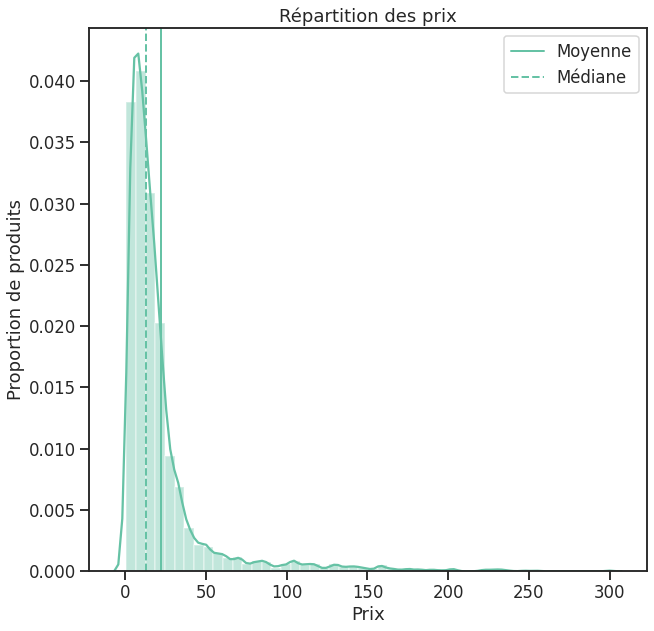

In [14]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

_ = plt.figure(figsize = (10,10))
_ = sns.distplot(prod['price'])
_ = plt.axvline(x=prod['price'].mean(), label='Moyenne', linestyle='-', linewidth=2)
_ = plt.axvline(x=prod['price'].median(), label='Médiane', linestyle='--', linewidth=2)
_ = plt.xlabel('Prix')
_ = plt.ylabel('Proportion de produits')
_ = plt.title('Répartition des prix')
_ = plt.legend()

_ = plt.savefig(f'{image_dir}/3 - Répartition des prix.jpg')
_ = plt.show()

In [15]:
prod_skew = st.skew(prod['price'])
print('Skewness des prix : ', prod_skew)

Skewness des prix :  3.797349627243213


In [16]:
print(prod.describe())

             price
count  3287.000000
mean     21.860508
std      29.845769
min       0.620000
25%       6.990000
50%      13.060000
75%      22.990000
max     300.000000


La distribution des valeurs des prix est asymétrique. Le prix moyen des produits est de 21.86€ (std: 29.84€) et la médiane est de 13.07€. La médiane est plus précise que la moyenne dans ce cas car elle n'est pas sensible aux outliers (article à 300€). L'asymétrie vers la gauche des prix montre que la plupart des produits sont petits. 

On s'intéresse ensuite à la répartition des prix en fonction de leurs catégories. 

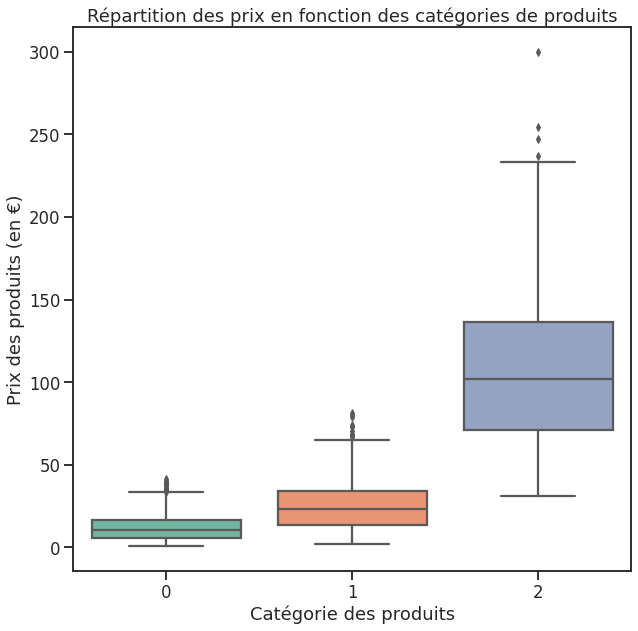

In [17]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=(10,10))

_ = sns.boxplot(data=prod, x='categ', y='price')
_ = plt.xlabel('Catégorie des produits')
_ = plt.ylabel('Prix des produits (en €)')
_ = plt.title('Répartition des prix en fonction des catégories de produits')

_ = plt.savefig(f'{image_dir}/4 - Répartition des produits par catégorie.jpg')

_ = plt.show()

#### 2.2.2. Conclusion

La liste des produits contient 3286 produits. Ces produits sont répartis en trois catégories. La catégorie 0 contient des produits dont le prix maximum est inférieur à 50€, la catégorie 1 contient des produits dont le prix maximum est comprits entre 50 et 100€. Enfin, la catégorie 2 contient des produits dont la valeur médiane est de 100€. 

## 2.3. Analyse des transactions

#### 2.3.1. Calculs et représentations graphiques

On modifie la date pour la transformer en type datetime puis on l'affiche uniquement sous la forme 'année-mois-jour' puis on crée une nouvelle colonne contenant uniquement le mois et l'année. 

In [18]:
sells['date'] = pd.to_datetime(sells['date'])
sells['date'] = sells['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
sells['date'] = pd.to_datetime(sells['date'])
sells['mois-année'] = sells['date'].apply(lambda x: x.strftime("%b %Y"))
sells.head()

,date,id_prod,session_id,client_id,mois-année
0,2021-03-01,0_1259,s_1,c_329,Mar 2021
1,2021-03-01,0_1390,s_2,c_664,Mar 2021
2,2021-03-01,0_1352,s_3,c_580,Mar 2021
3,2021-03-01,0_1458,s_4,c_7912,Mar 2021
4,2021-03-01,0_1358,s_5,c_2033,Mar 2021


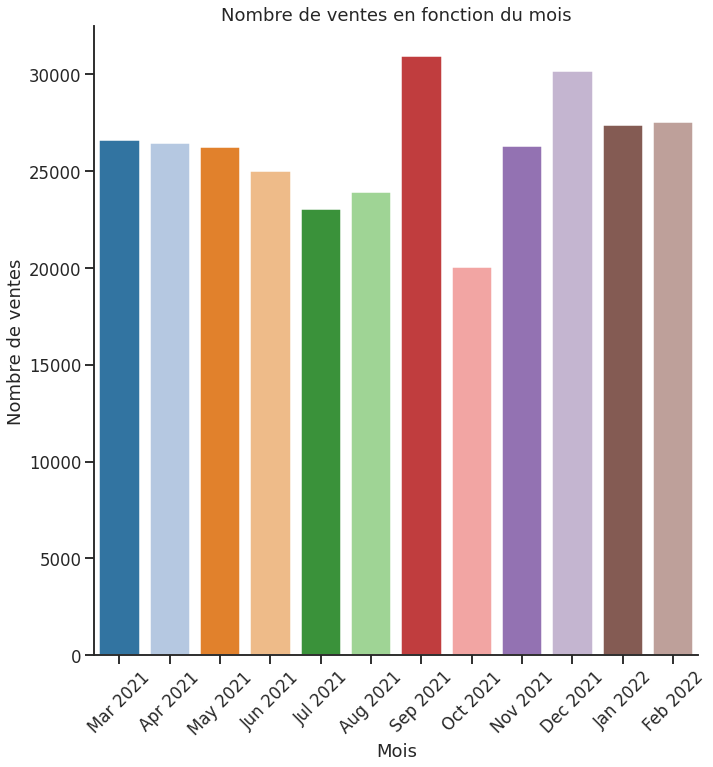

In [19]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('tab20')

_ = sns.catplot('mois-année', data=sells, kind='count', height=10)
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Nombre de ventes')
_ = plt.title('Nombre de ventes en fonction du mois')

_ = plt.savefig(f'{image_dir}/5 - Nombre de ventes mensuelles.jpg')

_ = plt.show()

On observe une forte baisse des ventes pour le mois d'octobre. 

In [20]:
df = pd.merge(sells, custom, on = 'client_id')
df = pd.merge(df, prod, on = 'id_prod')
sells_ca = df.groupby('mois-année').sum().reset_index()
sells_ca['mois-année'] = pd.to_datetime(sells_ca['mois-année'])
sells_ca = sells_ca.sort_values('mois-année')
sells_ca['cumprice'] = sells_ca['price'].cumsum()
sells_ca = sells_ca[['mois-année', 'price', 'cumprice']]

print(sells_ca)
print('Total du chiffre d\'affaire :', sells_ca['price'].sum())

   mois-année      price      cumprice
7  2021-03-01  443044.50  4.430445e+05
0  2021-04-01  436338.08  8.793826e+05
8  2021-05-01  451405.62  1.330788e+06
6  2021-06-01  444937.73  1.775726e+06
5  2021-07-01  445703.25  2.221429e+06
1  2021-08-01  443277.07  2.664706e+06
11 2021-09-01  466890.88  3.131597e+06
10 2021-10-01  295320.52  3.426918e+06
9  2021-11-01  475229.58  3.902147e+06
2  2021-12-01  484825.77  4.386973e+06
4  2022-01-01  486633.93  4.873607e+06
3  2022-02-01  490225.32  5.363832e+06
5363832.249999113


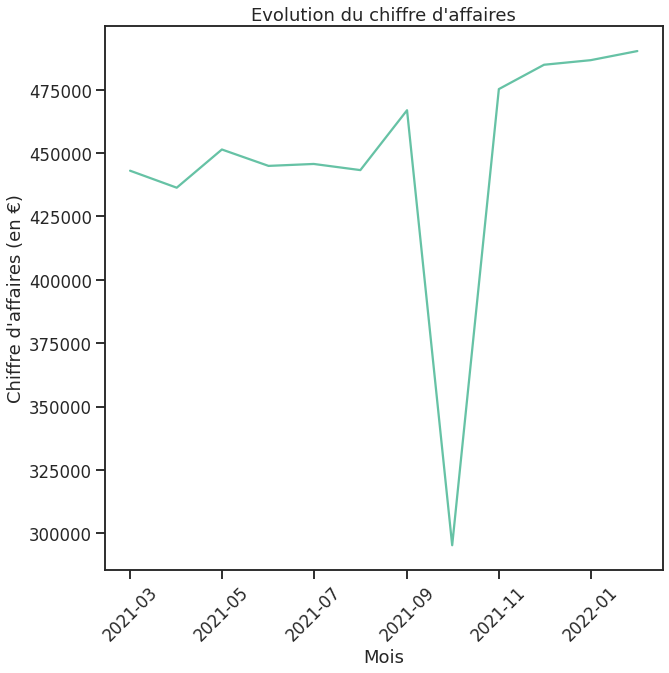

In [21]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

_ = plt.plot(sells_ca['mois-année'], sells_ca['price'])
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Mois')
_ = plt.ylabel('Chiffre d\'affaires (en €)')
_ = plt.title('Evolution du chiffre d\'affaires')

_ = plt.savefig(f'{image_dir}/6 - CA mensuel.jpg')

_ = plt.show()

Le chiffres d'affaires chutent brutalement au mois d'octobre. Ces données vont dans le même sens que celle du nombre de ventes. Cette diminution est expliquée dans le script de nettoyage.

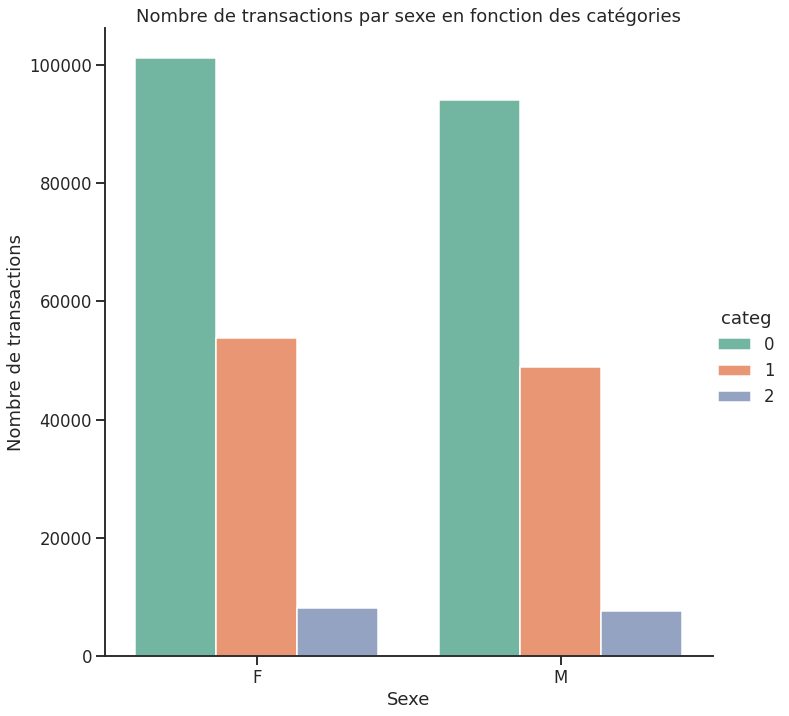

In [22]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

_ = sns.catplot('sex', hue='categ', data=df, kind='count', height=10)
_ = plt.xlabel('Sexe')
_ = plt.ylabel('Nombre de transactions')
_ = plt.title('Nombre de transactions par sexe en fonction des catégories')

_ = plt.savefig(f'{image_dir}/7 - Nombre de transactions par sexe et catégorie.jpg')

_ = plt.show()

On observe que le sexe n'a pas d'influence sur les catégories d'achat. Les clients achetent énormément de produits de la catégorie 0 et moins de la catégorie 2.

In [23]:
df_custom = df
df_custom['count'] = 1
df_custom = df.groupby('client_id').sum().reset_index()
df_custom = df_custom.sort_values('count', ascending=False)
df_custom = df_custom[['client_id', 'count']]
df_custom = pd.merge(df_custom, custom, on='client_id')
df_custom = df_custom.sort_values('count', ascending=False)
top_10 = df_custom.iloc[0:10]
print(top_10)

  client_id  count sex  birth  age classe_age
0    c_2140    195   F   1977   45      31-50
1    c_7959    195   F   1974   48      31-50
2    c_8026    193   M   1978   44      31-50
3    c_2595    193   M   1974   48      31-50
4    c_3725    190   F   1980   42      31-50
5    c_8392    189   F   1978   44      31-50
6    c_7421    189   M   1978   44      31-50
7    c_3263    188   F   1985   37      31-50
8    c_2077    188   F   1984   38      31-50
9    c_8556    187   M   1976   46      31-50


In [24]:
df_prod = df
df_prod['count'] = 1
df_prod = df_prod.groupby('id_prod').sum().reset_index()
df_prod = df_prod.sort_values('count', ascending=False)
df_prod = df_prod[['id_prod', 'count']]
df_prod = pd.merge(df_prod, prod, on=['id_prod'])
top_10_prod = df_prod.iloc[0:10]
print(top_10_prod)

  id_prod  count  price categ
0   1_369   1015  23.99     1
1   1_417    996  20.99     1
2   1_414    966  23.83     1
3   1_498    955  23.37     1
4   1_425    941  16.99     1
5   1_413    896  17.99     1
6   1_398    891  10.17     1
7   1_412    884  16.65     1
8   1_406    881  24.81     1
9   1_407    878  15.99     1


#### 2.3.1. Conclusion

Le nombre de ventes est globalement le même tous les mois. On observe une diminution du nombre de transaction en octobre. Cette diminution s'observe aussi sur le chiffre d'affaires. Mis à part l'incident du mois d'octobre, le chiffre d'affaire est en augmentation constante sur l'année.

## 3. Analyse de concentration

In [25]:
df_age = df.groupby('age').sum().reset_index()
df_age['cum_achat'] = df_age['count'].cumsum()

In [26]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

X = np.array(df_age['cum_achat'])
print('Indice de Gini : ', gini(X))

Indice de Gini :  0.2945215743588001


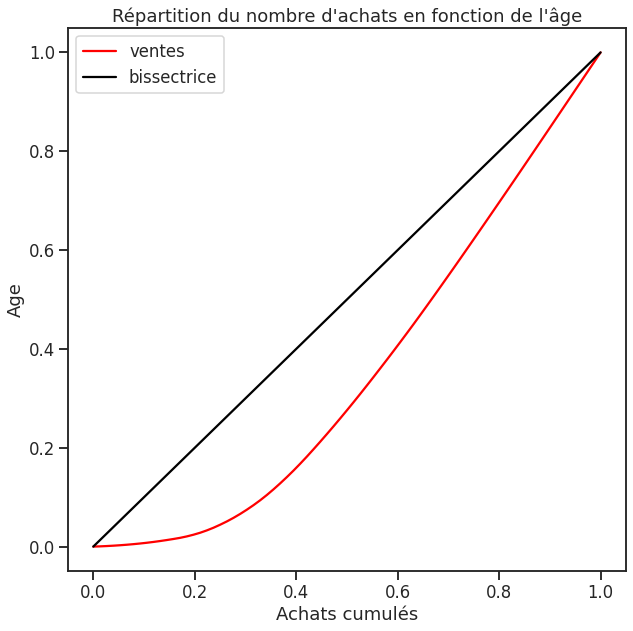

In [27]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

fig, ax = plt.subplots(figsize=[10,10])
_ = ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='red', label='ventes')
_ = ax.plot([0,1], [0,1], color='k', label='bissectrice')
_ = plt.xlabel('Achats cumulés')
_ = plt.ylabel('Age')
_ = plt.title('Répartition du nombre d\'achats en fonction de l\'âge')
_ = plt.legend()

_ = plt.savefig(f'{image_dir}/8 - Courbe de Lorenz.jpg')

_ = plt.show()

## 4. Analyses bivariées

Plusieurs analyses bivariées ont été réalisés pour mieux comprendre le comportement de nos clients. 

### 4.1. Corrélation entre le sexe des clients et la catégorie des achats

In [28]:
df_categ = df[['sex', 'categ']]
df_categ = df_categ.astype('str')

In [29]:
X = 'sex'
Y = 'categ'
cont = df_categ[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len, margins=True, margins_name='Total')

In [30]:
print(cont)

categ       0       1      2   Total
sex                                 
F      101206   53774   8122  163102
M       94064   48851   7634  150549
Total  195270  102625  15756  313651


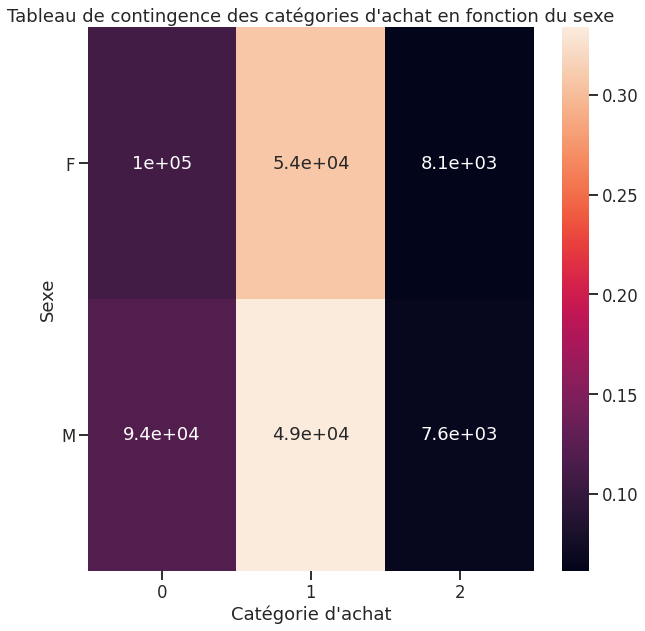

In [31]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_categ)
indep = tx.dot(ty) / n

c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

_ = plt.figure(figsize = (10,10))
_ = sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
_ = plt.xlabel('Catégorie d\'achat')
_ = plt.ylabel('Sexe')
_ = plt.yticks(rotation = 360)
_ = plt.title('Tableau de contingence des catégories d\'achat en fonction du sexe')

_ = plt.savefig(f'{image_dir}/9 - Tableau de contingences cat_sexe.jpg')

_ = plt.show()

In [32]:
print('xi_n : ', xi_n)

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
print('chi-squared :', st_chi2)
print('p-value :', st_p)

xi_n :  10.11086551372657
chi-squared : 10.110865513726571
p-value : 0.12006020526443334


Selon la table d'interprétation du chi-2, on a plus de 99% de chances que les variables 'catégorie d'achat' et 'sexe' ne soient pas indépendantes. Cela signifie qu'il y a bien une corrélation entre le sexe des clients et la catégorie d'achat. Globalement, les femmes ont tendance à plus acheter que les hommes.

*Le calcul de la p-value montre en revanche que cette non indépendances n'est pas significativement statistiquement. *

### 4.2.  Corrélation entre l'âge des clients et le montant total des achats

In [33]:
df_age = df
df_age = df_age.groupby(by=['client_id', 'age']).sum()
df_age = df_age.reset_index()
df_age.head()

,client_id,age,birth,price,count
0,c_1,67,39100,300.65,20
1,c_10,66,54768,586.18,28
2,c_100,30,11952,222.87,6
3,c_1000,56,110096,980.02,56
4,c_1001,40,114956,1102.45,58


In [34]:
x = df_age['age']
y = df_age['price']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_age['price']
X = df_age[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']
print('r-squared : ', (st.pearsonr(x,y)[0])**2)

rho de pearson : -0.1903609767899329
indice de covariation : -1471.4426489500459
r-squared :  0.036237301484417374


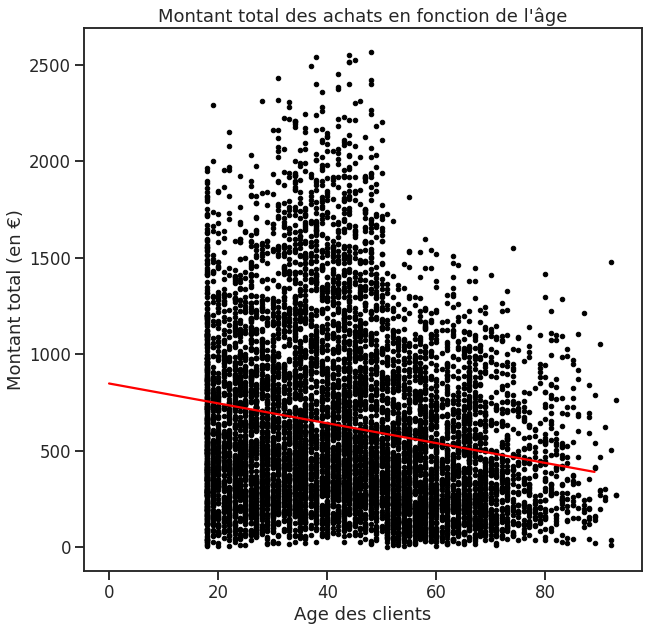

In [35]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_age.age,df_age.price, ".", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Age des clients")
_ = plt.ylabel("Montant total (en €)")
_ = plt.title('Montant total des achats en fonction de l\'âge')

_ = plt.savefig(f'{image_dir}/10 - Age_montant_regression.jpg')

_ = plt.show()

Le coefficient de Pearson et le R² ne montre pas de corrélation entre l'âge des clients et le montant total des achats. Cependant, on remarque que les âges sont des variables discrètes. Il peut donc être intéressant de faire une analyse sous forme de boxplot avec le calcul d'une ANOVA pour pouvoir mieux voir les corrélations existantes. 

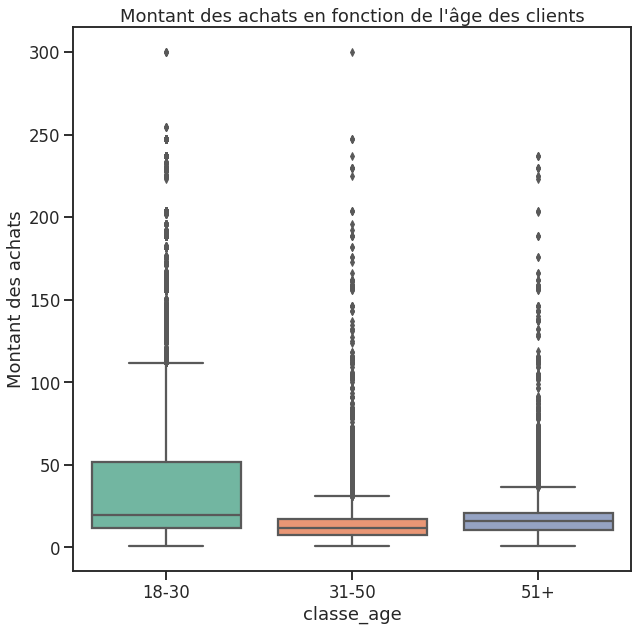

In [36]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='classe_age', y='price', data=df)
_ = plt.ylabel('Montant des achats')
_ = plt.title('Montant des achats en fonction de l\'âge des clients')

_ = plt.savefig(f'{image_dir}/11 - Corrélation age_montant_anova.jpg')

_ = plt.show()

In [37]:
X = df['classe_age'] # qualitative
Y = df['price']

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.17731732878662615


Le coefficient eta² montre un fort effet de ces variables l'une sur l'autre. Il y a donc corrélation entre la classe d'âge et le montant total des achats. Les clients de la tranche d'âge 18-30 ans ont tendance à dépenser plus que les clients des deux autres tranches d'âge. 

### 4.3. Corrélation entre l'âge des clients et la fréquence d’achat

In [38]:
df_freq = df
df_freq['nb_achat'] = 1
df_freq = df.groupby(['mois-année', 'age', 'session_id']).sum().reset_index()
df_freq['mois-année'] = pd.to_datetime(df_freq['mois-année']) 
df_freq = df_freq[['mois-année', 'age', 'nb_achat']]
df_freq = df_freq.sort_values(['mois-année', 'age'])
df_freq.head()

,mois-année,age,nb_achat
93167,2021-03-01,18,2
93168,2021-03-01,18,1
93169,2021-03-01,18,6
93170,2021-03-01,18,1
93171,2021-03-01,18,2


In [39]:
x = df_freq['age']
y = df_freq['nb_achat']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_freq['nb_achat']
X = df_freq[['age']]
X = X.copy()
X['intercept'] = 1.
result = sm.OLS(Y, X).fit()
a,b = result.params['age'],result.params['intercept']

print('r-squared : ', (st.pearsonr(x, y)[0])**2)

rho de pearson : -0.19398010753704498
indice de covariation : -3.7355267432414516
r-squared :  0.03762828212008353


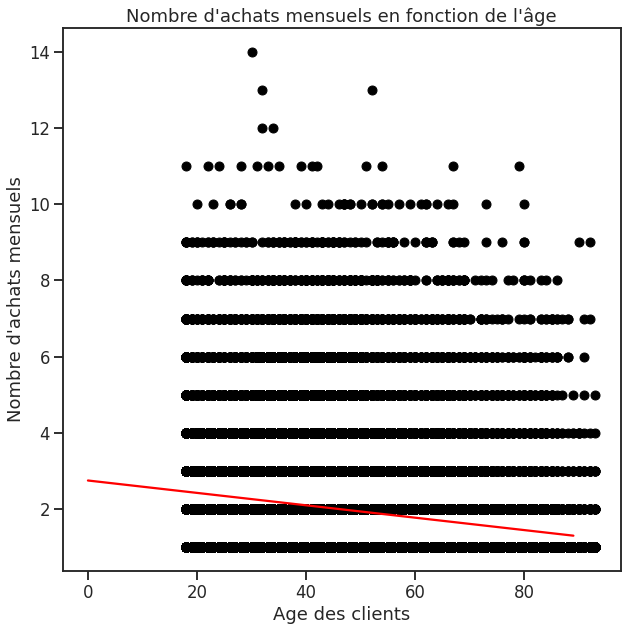

In [40]:
sns.set_context('talk')
sns.set_palette('Set1')

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_freq.age,df_freq.nb_achat, "o", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Age des clients")
_ = plt.ylabel("Nombre d'achats mensuels")
_ = plt.title('Nombre d\'achats mensuels en fonction de l\'âge')

_ = plt.savefig(f'{image_dir}/12 - nbachats_age.jpg')

_ = plt.show()

In [41]:
df_freq = df
df_freq['nb_achat'] = 1
df_freq = df.groupby(['mois-année', 'classe_age']).sum().reset_index()
df_freq['mois-année'] = pd.to_datetime(df_freq['mois-année']) 
df_freq = df_freq[['mois-année', 'classe_age', 'nb_achat']]
df_freq = df_freq.sort_values(['mois-année', 'classe_age'])
df_freq['freq_achat'] = 1/df_freq['nb_achat']
df_freq.head()

,mois-année,classe_age,nb_achat,freq_achat
21,2021-03-01,18-30,3633,0.000275
22,2021-03-01,31-50,16504,0.000061
23,2021-03-01,51+,6479,0.000154
0,2021-04-01,18-30,3720,0.000269
1,2021-04-01,31-50,16673,0.000060


Le coefficient de Pearson et le R² ne montrent pas de corrélation entre nos données. Cependant, le problème ici est le même que pour la corrélation précédente. C'est pour cela que nous allons réaliser cette étude en considérant l'âge comme une variable catégorielle avec des classes d'âge. 

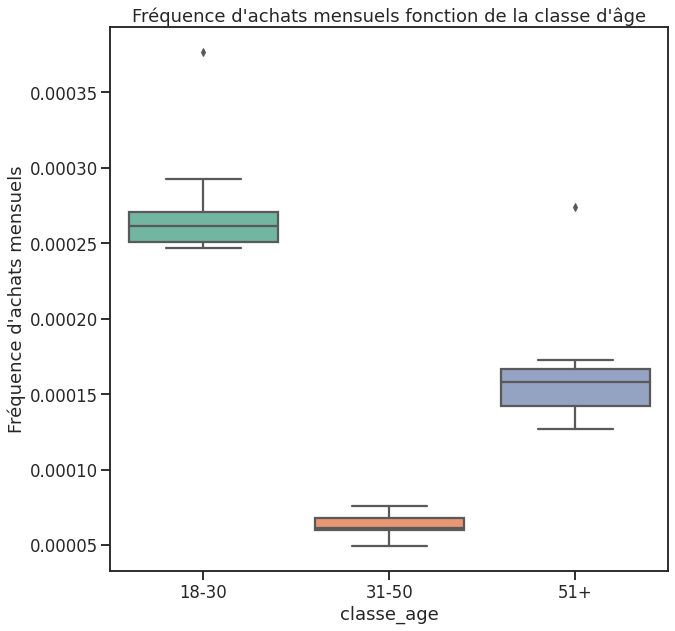

In [42]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='classe_age', y='freq_achat', data=df_freq)
_ = plt.ylabel('Fréquence d\'achats mensuels')
_ = plt.title('Fréquence d\'achats mensuels fonction de la classe d\'âge')

_ = plt.savefig(f'{image_dir}/13 - freqachat_age_anova.jpg')

_ = plt.show()

In [43]:
X = df_freq['classe_age'] # qualitative
Y = df_freq['freq_achat'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.8943543478006662


Le coefficient eta² de notre ANOVA montre une très forte corrélation entre l'âge et la fréquence d'achat. Les clients de la tranche d'âge 18-30 ans sont ceux qui, en plus de dépenser le plus, achètent le plus fréquemment. 

### 4.4. Corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)

In [44]:
pd.set_option('mode.chained_assignment', None)
cols = ['session_id', 'id_prod']
df_pan_count = df[cols]
df_pan_count['taille_panier'] = 1
df_pan_count = df_pan_count.sort_values('session_id')
df_pan_count = df_pan_count.groupby('session_id').sum().reset_index()

cols_2 = ['session_id', 'id_prod', 'client_id', 'age', 'classe_age']
df_pan_moy = df[cols_2]
df_pan_moy = pd.merge(df_pan_moy, df_pan_count, on = 'session_id')
df_pan_count
df_pan_moy.head()

,session_id,id_prod,client_id,age,classe_age,taille_panier
0,s_1,0_1259,c_329,55,51+,1
1,s_149171,0_1259,c_1478,50,31-50,4
2,s_149171,1_406,c_1478,50,31-50,4
3,s_149171,0_1826,c_1478,50,31-50,4
4,s_149171,1_718,c_1478,50,31-50,4


In [45]:
x = df_pan_moy['age']
y = df_pan_moy['taille_panier']

print('rho de pearson :', st.pearsonr(x, y)[0])
print('indice de covariation :', np.cov(x, y, ddof=0)[1,0])

Y = df_pan_moy['taille_panier']
X = df_pan_moy[['age']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['age'],result.params['intercept']

print('r-squared : ', (st.pearsonr(x, y)[0])**2)

rho de pearson : -0.16086653004136886
indice de covariation : -3.622421694785836
r-squared :  0.02587804048755063


<Figure size 720x720 with 0 Axes>

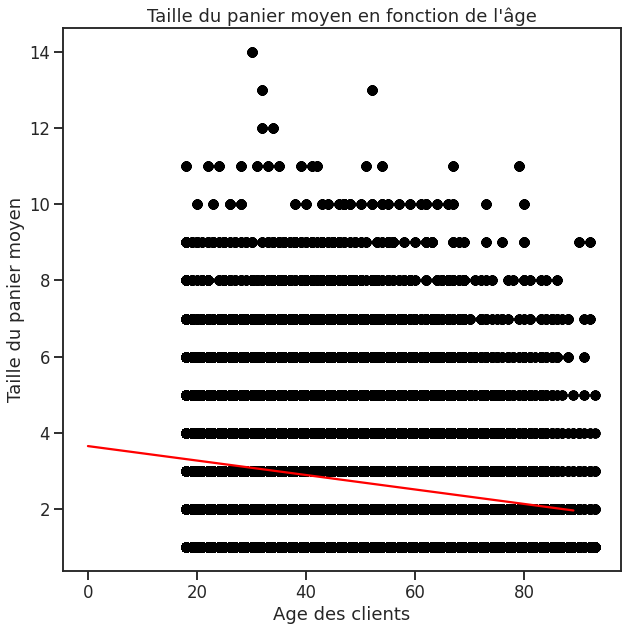

In [46]:
sns.set_context('talk')
sns.set_palette('Set1')
plt.figure(figsize=[10,10])

_ = plt.figure(figsize = (10,10))
_ = plt.plot(df_pan_moy.age,df_pan_moy.taille_panier, "o", color='k')
_ = plt.plot(np.arange(90),[a*x+b for x in np.arange(90)], color='r')
_ = plt.xlabel("Age des clients")
_ = plt.ylabel("Taille du panier moyen")
_ = plt.title('Taille du panier moyen en fonction de l\'âge')

_ = plt.savefig(f'{image_dir}/14 - panier_moy_age_reg.jpg')

_ = plt.show()

Le coefficient de Pearson et le R² ne montrent aucune corrélation entre l'âge des clients et la taille du panier. Une étude avec des classes d'âge (variables catégorielles) va donc être réalisée. 

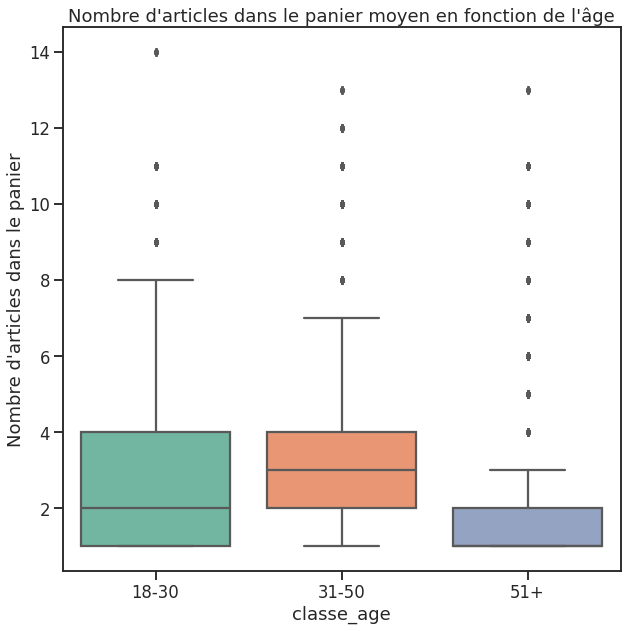

In [47]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='classe_age', y='taille_panier', data=df_pan_moy)
_ = plt.ylabel('Nombre d\'articles dans le panier')
_ = plt.title('Nombre d\'articles dans le panier moyen en fonction de l\'âge')

_ = plt.savefig(f'{image_dir}/15 - panier_moy_age_anova.jpg')

_ = plt.show()

In [48]:
X = df_pan_moy['classe_age'] # qualitative
Y = df_pan_moy['taille_panier'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.06168989573959316


Le coefficient eta² montre une corrélation de force moyenne entre notre deux variables. Il existe une valeur seuile de 1 car il doit forcément y avoir un article dans le panier de chaque client pour qu'on puisse comptabiliser un achat. On observe cependant que les clients de la tranche d'âge 18-30 ans sont ceux qui vont acheter le plus d'articles (max : 8). 

### 4.5. Corrélation entre l'âge des clients et les catégories de produits achetés

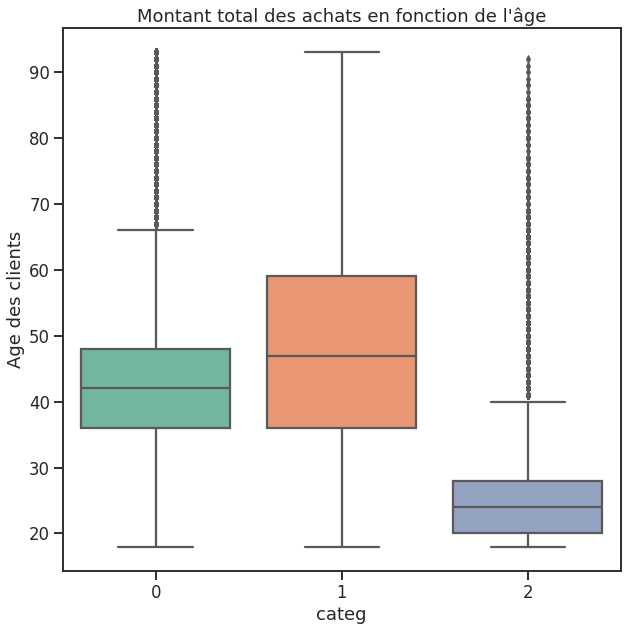

In [49]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

_ = sns.boxplot(x='categ', y='age', data=df)
_ = plt.ylabel('Age des clients')
_ = plt.title('Montant total des achats en fonction de l\'âge')

_ = plt.savefig(f'{image_dir}/16 - categ_age_anova.jpg')

_ = plt.show()

In [50]:
X = df['categ'] # qualitative
Y = df['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.1127902993231092


Le coefficient eta² montre une forte corrélation entre l'âge des clients et la catégorie d'achat. Les clients les plus jeunes vont essentiellement se tourner vers l'achat de catégorie 2 alors que les autres catégories de produits vont être acheté par tout type de clients. 